In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Read the CSV file
data = pd.read_csv('/Users/cyrusachtari/Desktop/UBS-ZebraByte/data/skylab_instagram_datathon_dataset.csv', delimiter=';')

In [52]:
data.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0


In [53]:
for column in data.select_dtypes(include='object').columns:
    unique_values = data[column].unique()
    print(f"Unique values for column {column}: {unique_values}")


Unique values for column period: ['Weekly']
Unique values for column period_end_date: ['2019-12-07' '2021-01-30' '2016-05-14' '2019-04-20' '2023-03-25'
 '2019-11-23' '2017-08-19' '2019-02-16' '2020-05-30' '2020-03-07'
 '2015-03-28' '2016-04-09' '2016-06-25' '2021-10-23' '2017-04-29'
 '2020-03-14' '2020-12-05' '2018-10-13' '2017-02-04' '2017-04-01'
 '2023-01-21' '2018-05-12' '2015-10-17' '2019-01-05' '2021-04-10'
 '2015-09-05' '2015-03-14' '2016-04-02' '2019-04-13' '2019-06-29'
 '2020-07-04' '2021-04-17' '2019-07-27' '2021-03-13' '2019-12-21'
 '2022-11-19' '2019-07-13' '2017-01-14' '2015-11-07' '2016-07-23'
 '2018-08-25' '2020-06-20' '2015-01-03' '2020-02-29' '2015-04-11'
 '2020-12-26' '2017-11-25' '2019-08-03' '2023-04-15' '2016-10-22'
 '2017-09-16' '2022-02-05' '2017-05-06' '2016-05-07' '2017-09-09'
 '2021-03-20' '2018-07-21' '2023-03-18' '2020-01-04' '2021-06-19'
 '2016-11-19' '2023-04-08' '2022-04-23' '2021-08-14' '2022-04-09'
 '2023-09-09' '2016-08-13' '2021-05-15' '2019-11-30' '20

In [54]:
compset_group_counts = data['compset_group'].value_counts()
print(compset_group_counts)

compset_group
Luxury & Premium & Mainstream    216241
Apparel Retail                   209573
Sportswear & Athleisure           57068
Beauty & Boutique                 44266
Food Products                     42612
Beverages                         41471
Restaurants                       37599
Outdoor Gear                       9536
Fitness & Exercise                 8978
Dermatology and Orthodontics       7819
Mattress                           5107
Petcare                            4896
Building Products                  4376
Sporting Goods                     3185
Home Appliances                    3013
Food Retail                        2574
Toys & Collectibles                2229
Discount Retailers                 2100
Entertainment                      1215
Study (All Brands)                  455
Name: count, dtype: int64


In [55]:
unique_values = data['calculation_type'].unique()
print(f"Unique values for column 'business_entity_doing_business_as_name': {unique_values}")
print()


Unique values for column 'business_entity_doing_business_as_name': ['Metric Value']



In [56]:
ca_values = data[data['business_entity_doing_business_as_name'].str.startswith('C&A')]['business_entity_doing_business_as_name'].unique()
print(ca_values)


['C&A Brasil' 'C&A']


In [57]:
print(data[data['business_entity_doing_business_as_name'] == 'C&A'].head(1))
print(data[data['business_entity_doing_business_as_name'] == 'C&A Brasil'].head(1))


       period period_end_date   compset_group                     compset  \
39266  Weekly      2018-03-10  Apparel Retail  Omnichannel Apparel Retail   

      business_entity_doing_business_as_name legal_entity_name  \
39266                                    C&A  COFRA Holding AG   

      domicile_country_name ultimate_parent_legal_entity_name  \
39266                   NaN                  COFRA Holding AG   

      primary_exchange_name calculation_type  followers  pictures  videos  \
39266                   NaN     Metric Value   489271.0      54.0    11.0   

       comments     likes  
39266     680.0  104227.0  
       period period_end_date   compset_group               compset  \
37446  Weekly      2015-06-06  Apparel Retail  Latam Apparel Retail   

      business_entity_doing_business_as_name legal_entity_name  \
37446                             C&A Brasil      C&A MODAS SA   

      domicile_country_name ultimate_parent_legal_entity_name  \
37446                Brazil  

In [58]:
unique_dates = data['period_end_date'].unique()
unique_dates.sort()
for date in unique_dates:
    print(date)


2015-01-03
2015-01-10
2015-01-17
2015-01-24
2015-01-31
2015-02-07
2015-02-14
2015-02-21
2015-02-28
2015-03-07
2015-03-14
2015-03-21
2015-03-28
2015-04-04
2015-04-11
2015-04-18
2015-04-25
2015-05-02
2015-05-09
2015-05-16
2015-05-23
2015-05-30
2015-06-06
2015-06-13
2015-06-20
2015-06-27
2015-07-04
2015-07-11
2015-07-18
2015-07-25
2015-08-01
2015-08-08
2015-08-15
2015-08-22
2015-08-29
2015-09-05
2015-09-12
2015-09-19
2015-09-26
2015-10-03
2015-10-10
2015-10-17
2015-10-24
2015-10-31
2015-11-07
2015-11-14
2015-11-21
2015-11-28
2015-12-05
2015-12-12
2015-12-19
2015-12-26
2016-01-02
2016-01-09
2016-01-16
2016-01-23
2016-01-30
2016-02-06
2016-02-13
2016-02-20
2016-02-27
2016-03-05
2016-03-12
2016-03-19
2016-03-26
2016-04-02
2016-04-09
2016-04-16
2016-04-23
2016-04-30
2016-05-07
2016-05-14
2016-05-21
2016-05-28
2016-06-04
2016-06-11
2016-06-18
2016-06-25
2016-07-02
2016-07-09
2016-07-16
2016-07-23
2016-07-30
2016-08-06
2016-08-13
2016-08-20
2016-08-27
2016-09-03
2016-09-10
2016-09-17
2016-09-24

In [59]:
# Créer une liste de toutes les dates de fin de semaine de janvier 2015 à décembre 2023
all_weekend_dates = pd.date_range(start='2015-01-03', end='2023-09-16', freq='W-SAT')

# Convertir les dates uniques en datetime pour la comparaison
unique_dates = pd.to_datetime(unique_dates)

# Vérifier si chaque date de la liste est présente dans unique_dates
missing_dates = [date for date in all_weekend_dates if date not in unique_dates]

print(missing_dates)
# Imprimer les dates manquantes
for date in missing_dates:
    print(date)

[]


In [41]:
# Grouper les données par 'brand' et 'compset_group'
grouped = data.groupby(['business_entity_doing_business_as_name', 'compset_group'])

missing_dates_by_group = {}

# Pour chaque groupe, vérifier si toutes les dates existent
for name, group in grouped:
    unique_dates = pd.to_datetime(group['period_end_date'].unique())
    missing_dates = [date for date in all_weekend_dates if date not in unique_dates]
    missing_dates_by_group[name] = missing_dates

# Imprimer les dates manquantes pour chaque groupe
for group, missing_dates in missing_dates_by_group.items():
    print(f"Pour le groupe {group}, les dates manquantes sont : {len(missing_dates)}")
    #for date in missing_dates:
        #print(date)

Pour le groupe ('24S', 'Apparel Retail'), les dates manquantes sont : 122
Pour le groupe ('3.1 Phillip Lim', 'Luxury & Premium & Mainstream'), les dates manquantes sont : 0
Pour le groupe ('3CE', 'Beauty & Boutique'), les dates manquantes sont : 0
Pour le groupe ('A. Lange & Soehne', 'Luxury & Premium & Mainstream'), les dates manquantes sont : 52
Pour le groupe ('ANIMALE', 'Apparel Retail'), les dates manquantes sont : 52
Pour le groupe ('Abercrombie & Fitch', 'Apparel Retail'), les dates manquantes sont : 0
Pour le groupe ('About You', 'Apparel Retail'), les dates manquantes sont : 52
Pour le groupe ('Absolut', 'Beverages'), les dates manquantes sont : 0
Pour le groupe ('Academy Sports + Outdoors', 'Sporting Goods'), les dates manquantes sont : 0
Pour le groupe ('Acne Studios', 'Luxury & Premium & Mainstream'), les dates manquantes sont : 0
Pour le groupe ('Adidas', 'Sportswear & Athleisure'), les dates manquantes sont : 0
Pour le groupe ('Aerie', 'Apparel Retail'), les dates manquan

In [80]:
import matplotlib.dates as mdates

def plot_brand(data, brand='Versace', compset='Soft Luxury', metric='likes'):
    # Extraire les lignes pour la marque et le compset spécifiés et les trier par 'period_end_date', puis tracer la métrique au fil du temps
    subset = data[(data['business_entity_doing_business_as_name'] == brand) & (data['compset'] == compset)]
    
    # Convertir 'period_end_date' en datetime
    subset['period_end_date'] = pd.to_datetime(subset['period_end_date'])
    
    subset = subset.sort_values('period_end_date')
    
    fig, ax = plt.subplots()
    ax.plot(subset['period_end_date'], subset[metric])
    
    # Définir le format de l'axe des x pour afficher une marque tous les 3 mois
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    # Rendre les labels de l'axe des x verticaux
    plt.xticks(rotation='vertical')
    
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.title(f'{metric} for {brand} in the {compset} compset group')
    plt.show()
    

/var/folders/05/j8j7r4js16sg2jyk3313_4lw0000gn/T/ipykernel_20572/2006597918.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['period_end_date'] = pd.to_datetime(subset['period_end_date'])


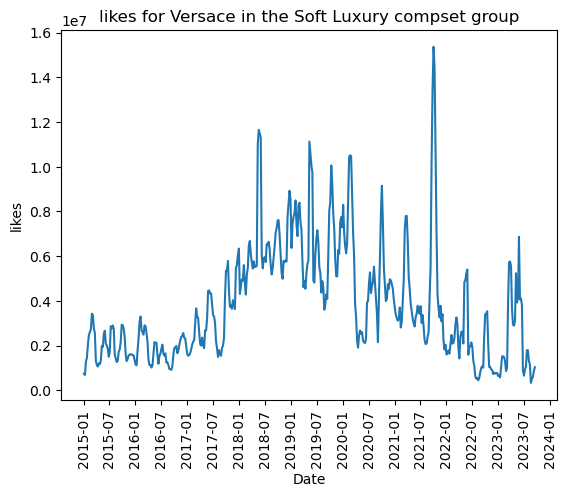

In [81]:
plot_brand(data, brand='Versace', compset='Soft Luxury', metric='likes')